In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from rdkit.Chem import MolFromSmiles, SanitizeFlags, SanitizeMol

from rosvm.feature_extraction.featurizer_cls import CircularFPFeaturizer
from rosvm.ranksvm.kernel_utils import minmax_kernel, generalized_tanimoto_kernel

In [2]:
df = pd.read_csv("smiles_db.tsv", sep="\t")
df.head()

,inchikey1,num_of_stereo_conf,smiles_can,smiles_iso
0,MJYJYRUSRDBHGO,4,CC1=C(C(=CC=C1)C)NC(=O)COC(=O)C2CC(=O)N(C2)C(C...,CC1=C(C(=CC=C1)C)NC(=O)COC(=O)[C@@H]2CC(=O)N(C...
1,TWJQZVQNZDQDHV,4,COC1=CC=CC(=C1)C=CC(=O)N2CCCC(C2)C(=O)O,"COC1=CC=CC(=C1)/C=C/C(=O)N2CCC[C@H](C2)C(=O)O,..."
2,IEJPCNQNQHXZNG,4,C1C(C(C(OC1(C(=O)O)O)O)O)O,"C1C(C(C(OC1(C(=O)O)O)O)O)O,C1[C@@H]([C@H]([C@H..."
3,WOGDAAPNOVKWJT,4,CCN1C=CC=C1C(=CCCN2CCCC(C2)C(=O)O)C3=CC=CC=C3,CCN1C=CC=C1C(=CCCN2CCC[C@H](C2)C(=O)O)C3=CC=CC...
4,NTJLQGQXAXJSBS,4,CCC(C)C(C(=O)O)NC(=O)CC(C1=CC=CC=C1)(C2=CC=CC=...,CC[C@H](C)[C@H](C(=O)O)NC(=O)CC(C1=CC=CC=C1)(C...


# Circular Fingerprints

## Without chirality information

### Train ECFP fingerprinter

In [3]:
ids = []
smis_iso = []
for _, row in df.iterrows():
    for smi in row["smiles_iso"].split(","):
        ids.append(row["inchikey1"])
        smis_iso.append(smi)


ec_fprinter_noc = CircularFPFeaturizer(fp_type="FCFP", only_freq_subs=True, min_subs_freq=0.01, radius=4, output_dense_matrix=True, use_chirality=False, n_jobs=4)
ec_fprinter_noc.fit(smis_iso)

RDKit WARNING: [12:12:16] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:12:16] WARNING: not removing hydrogen atom without neighbors


CircularFPFeaturizer(fp_type='FCFP', min_subs_freq=0.01, n_jobs=4,
                     only_freq_subs=True, output_dense_matrix=True, radius=4)

### Apply it to isomeric SMILES

In [4]:
X_iso_noc = ec_fprinter_noc.transform(smis_iso)
K_iso_noc = generalized_tanimoto_kernel(X_iso_noc, shallow_input_check=True, n_jobs=4)

RDKit WARNING: [12:12:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:12:25] WARNING: not removing hydrogen atom without neighbors


In [5]:
X_iso_noc.shape

(4000, 467)

### Plot Kernel matrix

['MJYJYRUSRDBHGO', 'MJYJYRUSRDBHGO', 'MJYJYRUSRDBHGO', 'MJYJYRUSRDBHGO', 'TWJQZVQNZDQDHV', 'TWJQZVQNZDQDHV', 'TWJQZVQNZDQDHV', 'TWJQZVQNZDQDHV', 'IEJPCNQNQHXZNG', 'IEJPCNQNQHXZNG', 'IEJPCNQNQHXZNG', 'IEJPCNQNQHXZNG', 'WOGDAAPNOVKWJT', 'WOGDAAPNOVKWJT', 'WOGDAAPNOVKWJT', 'WOGDAAPNOVKWJT', 'NTJLQGQXAXJSBS', 'NTJLQGQXAXJSBS', 'NTJLQGQXAXJSBS', 'NTJLQGQXAXJSBS', 'XWFZNWNGKWPCIP', 'XWFZNWNGKWPCIP', 'XWFZNWNGKWPCIP', 'XWFZNWNGKWPCIP', 'JDXYUTWNVLYVBQ', 'JDXYUTWNVLYVBQ', 'JDXYUTWNVLYVBQ', 'JDXYUTWNVLYVBQ', 'MNOLFWMZLYRGTE', 'MNOLFWMZLYRGTE', 'MNOLFWMZLYRGTE', 'MNOLFWMZLYRGTE']


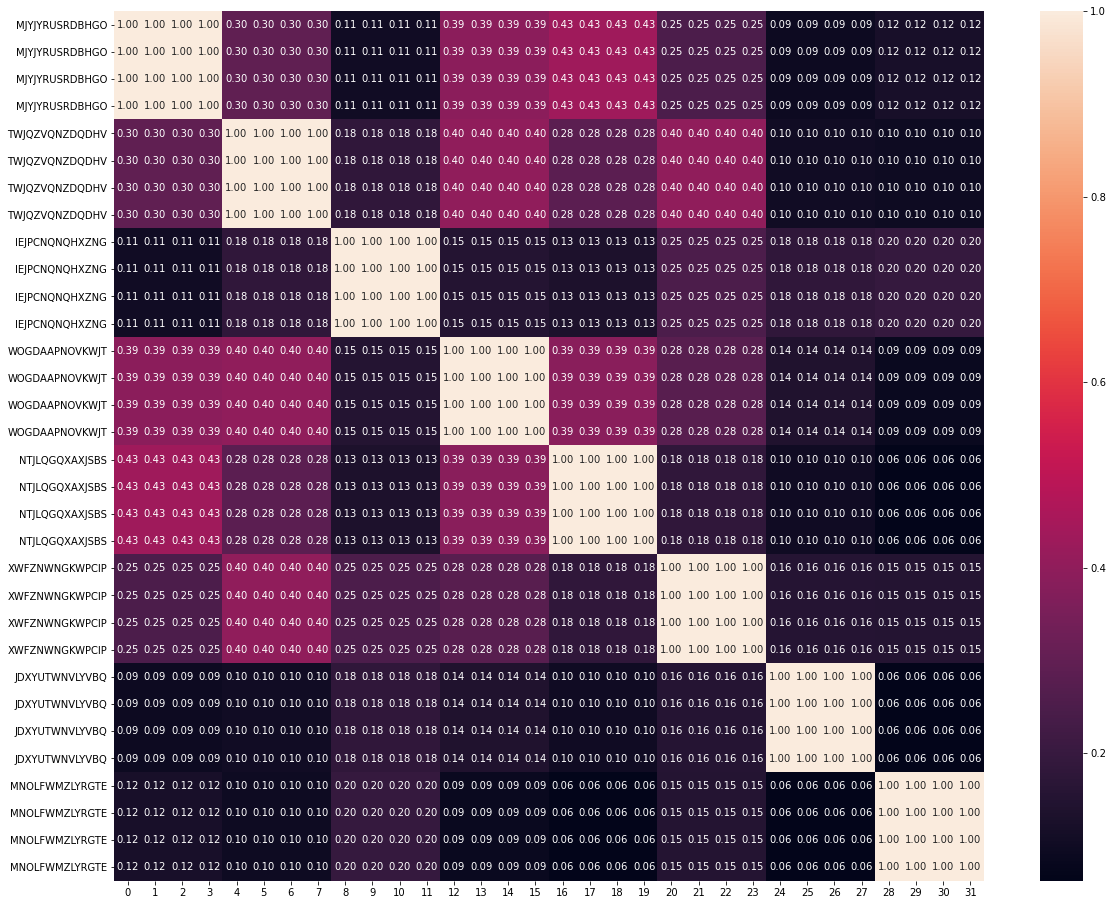

In [6]:
plt.figure(figsize=(20, 16))
sns.heatmap(pd.DataFrame(K_iso_noc[:32, :32], index=ids[:32]), square=True, annot=True, fmt=".2f")
print(ids[:32])

Each canonical smiles (~ inchikey1) has four (4) isomeric smiles. We can see that all for stereo configurations are equally represented. 

## With chirality information

### Train ECFP fingerprinter

In [8]:
ids = []
smis_iso = []
for _, row in df.iterrows():
    for smi in row["smiles_iso"].split(","):
        ids.append(row["inchikey1"])
        smis_iso.append(smi)

ec_fprinter_c = CircularFPFeaturizer(fp_type="FCFP", only_freq_subs=True, min_subs_freq=0.005, radius=6, output_dense_matrix=True, use_chirality=True, n_jobs=4)
ec_fprinter_c.fit(smis_iso)

RDKit WARNING: [12:12:49] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:12:49] WARNING: not removing hydrogen atom without neighbors


CircularFPFeaturizer(fp_type='FCFP', min_subs_freq=0.005, n_jobs=4,
                     only_freq_subs=True, output_dense_matrix=True, radius=6,
                     use_chirality=True)

### Apply it to isomeric SMILES

In [9]:
X_iso_c = ec_fprinter_c.transform(smis_iso)
K_iso_c = generalized_tanimoto_kernel(X_iso_c, shallow_input_check=True, n_jobs=4)

RDKit WARNING: [12:12:52] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [12:12:52] WARNING: not removing hydrogen atom without neighbors


In [10]:
X_iso_c.shape

(4000, 832)

### Plot Kernel matrix

['MJYJYRUSRDBHGO', 'MJYJYRUSRDBHGO', 'MJYJYRUSRDBHGO', 'MJYJYRUSRDBHGO', 'TWJQZVQNZDQDHV', 'TWJQZVQNZDQDHV', 'TWJQZVQNZDQDHV', 'TWJQZVQNZDQDHV', 'IEJPCNQNQHXZNG', 'IEJPCNQNQHXZNG', 'IEJPCNQNQHXZNG', 'IEJPCNQNQHXZNG', 'WOGDAAPNOVKWJT', 'WOGDAAPNOVKWJT', 'WOGDAAPNOVKWJT', 'WOGDAAPNOVKWJT', 'NTJLQGQXAXJSBS', 'NTJLQGQXAXJSBS', 'NTJLQGQXAXJSBS', 'NTJLQGQXAXJSBS', 'XWFZNWNGKWPCIP', 'XWFZNWNGKWPCIP', 'XWFZNWNGKWPCIP', 'XWFZNWNGKWPCIP', 'JDXYUTWNVLYVBQ', 'JDXYUTWNVLYVBQ', 'JDXYUTWNVLYVBQ', 'JDXYUTWNVLYVBQ', 'MNOLFWMZLYRGTE', 'MNOLFWMZLYRGTE', 'MNOLFWMZLYRGTE', 'MNOLFWMZLYRGTE']


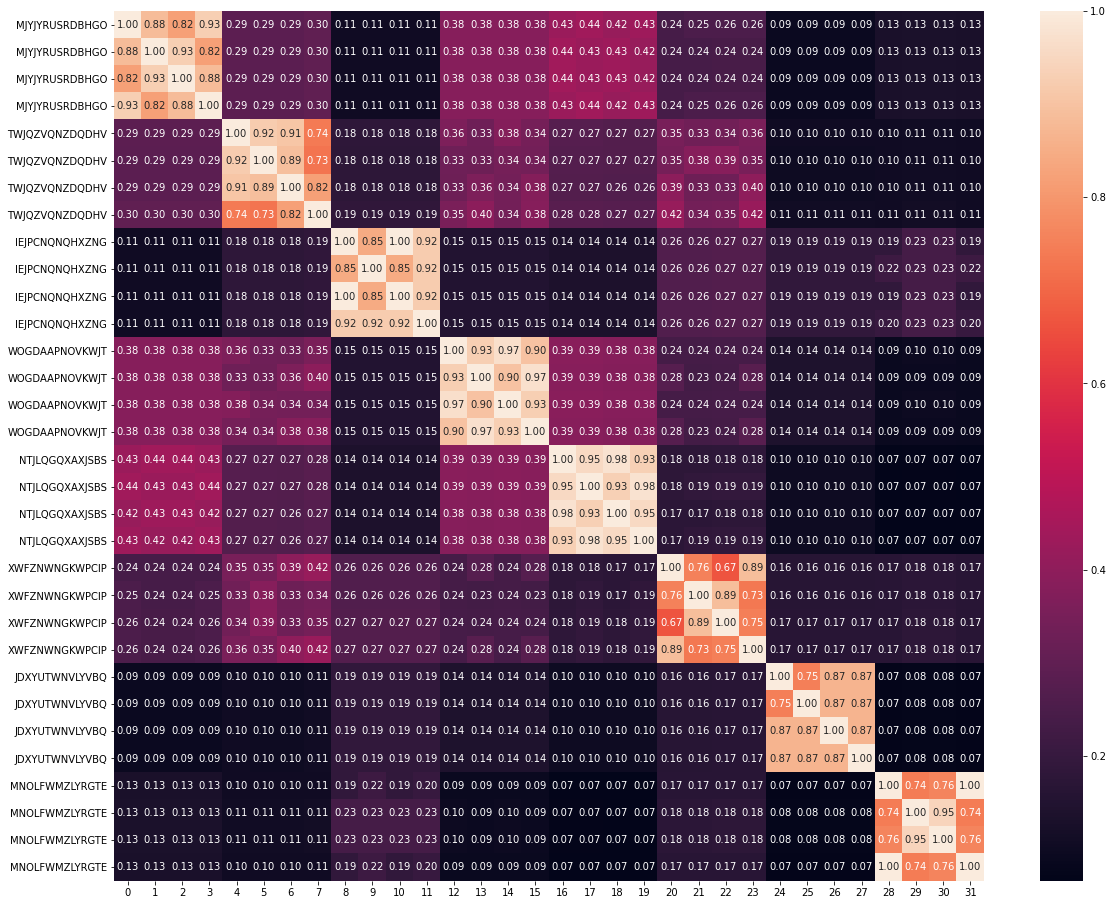

In [11]:
plt.figure(figsize=(20, 16))
sns.heatmap(pd.DataFrame(K_iso_c[:32, :32], index=ids[:32]), square=True, annot=True, fmt=".2f")
print(ids[:32])

Each canonical smiles (~ inchikey1) has four (4) isomeric smiles. We can see that all for stereo configurations are equally represented. 